In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/Users/sriramkurnella/AI/Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 14 - Logistic Regression/Python/Social_Network_Ads.csv')

In [112]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [7]:
import matplotlib.pyplot as plt



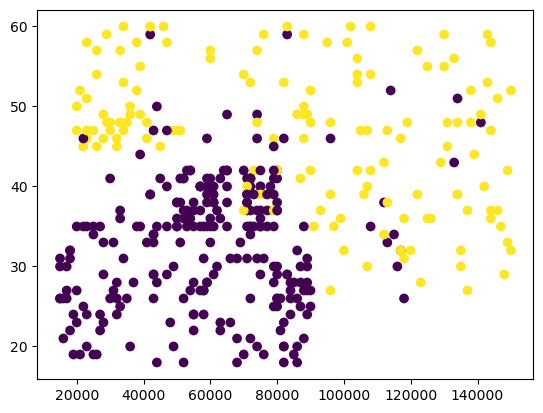

In [8]:
plt.scatter( df['EstimatedSalary'] , df['Age'] , c = df['Purchased'])
plt.show()

In [12]:
purchasers = df[df['Purchased'] == 1].reset_index(drop=True)

In [14]:
non_purchasers = df[df['Purchased'] == 0].reset_index(drop = True)

In [21]:
mean_age_of_purchasers = purchasers['Age'].mean()
std_dev_age_of_purchasers = purchasers['Age'].var()

In [23]:
std_dev_age_of_purchasers

74.16950654978824

In [20]:
mean_salary_of_purchasers = purchasers['EstimatedSalary'].mean()
std_dev_salary_of_purchasers = purchasers['EstimatedSalary'].var()

In [26]:
std_dev_salary_of_purchasers

1769396927.016646

In [73]:
import math

In [74]:
def hypothesis(theta_vector, features, sample_index):
    theta_trans_X = theta_vector[0]  # theta_not
    for i in range(len(features)):
        theta_trans_X += theta_vector[i + 1] * features[i][sample_index]
    prediction = 1 / (1 + math.exp(-theta_trans_X))
    return prediction

In [75]:

features = [df['Age'].tolist(), df['EstimatedSalary'].tolist()]

result_vector = [df['Purchased'].tolist()]

hypothesis((0 , 0 , 0) , features , 29)

0.5

In [102]:

ages = np.array(features[0])
salaries = np.array(features[1])

ages_normalized = (ages - np.min(ages)) / (np.max(ages) - np.min(ages))
salaries_normalized = (salaries - np.min(salaries)) / (np.max(salaries) - np.min(salaries))

features = [ages_normalized.tolist(), salaries_normalized.tolist()]

In [103]:
def theta_age(present_theta_age, learning_rate, no_of_samples, theta_vector, features, result_vector):
    error_summation = 0
    for i in range(no_of_samples):
        error_summation += (result_vector[0][i] - hypothesis(theta_vector, features, i)) * features[0][i]
    new_theta_age = present_theta_age + (learning_rate * (error_summation)) / no_of_samples
    return new_theta_age


In [104]:
def theta_salary(present_theta_salary, learning_rate, no_of_samples, theta_vector, features, result_vector):
    error_summation = 0
    for i in range(no_of_samples):
        error_summation += (result_vector[0][i] - hypothesis(theta_vector, features, i)) * features[1][i]
    new_theta_salary = present_theta_salary + (learning_rate * (error_summation)) / no_of_samples
    return new_theta_salary


In [105]:
def theta_not(present_theta_not, learning_rate, no_of_samples, theta_vector, features, result_vector):
    error_summation = 0
    for i in range(no_of_samples):
        error_summation += (result_vector[0][i] - hypothesis(theta_vector, features, i))
    new_theta_not = present_theta_not + (learning_rate * (error_summation)) / no_of_samples
    return new_theta_not

In [116]:
theta_not_val = 0
theta_age_val = 0
theta_salary_val = 0

learning_rate = 0.01

num_iterations = 10000

for _ in range(num_iterations):
    current_theta = (theta_not_val, theta_age_val, theta_salary_val)
    theta_not_val = theta_not(
        current_theta[0], learning_rate, len(df), current_theta, features, result_vector
    )
    theta_age_val = theta_age(
        current_theta[1], learning_rate, len(df), current_theta, features, result_vector
    )
    theta_salary_val = theta_salary(
        current_theta[2], learning_rate, len(df), current_theta, features, result_vector
    )

In [117]:
print("Final theta_not:", theta_not_val)
print("Final theta_age:", theta_age_val)
print("Final theta_salary:", theta_salary_val)

Final theta_not: -2.838130296378961
Final theta_age: 3.3629691546744676
Final theta_salary: 1.603971169680451


In [120]:
estimatedpurchased = []
for i in range(len(df)):
    estimatedpurchased.append(hypothesis((theta_not_val , theta_age_val , theta_salary_val) , features , i))

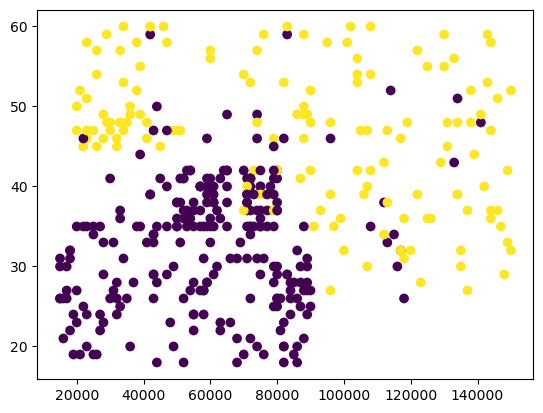

In [119]:
plt.scatter( df['EstimatedSalary'] , df['Age'] , c = df['Purchased'])
plt.show()

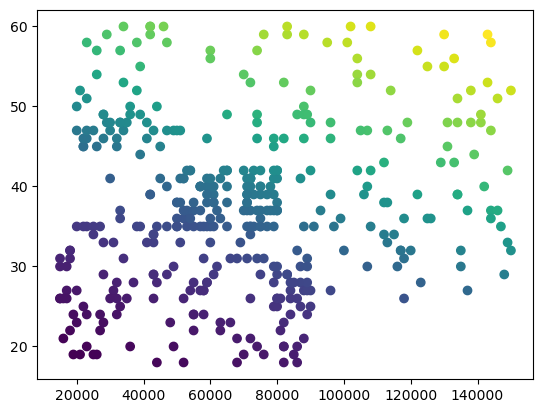

In [122]:
plt.scatter( df['EstimatedSalary'] , df['Age'] , c = (estimatedpurchased))
plt.show()